# Voting Behavior Analysis for the Rio de Janeiro Mayor Election: 24 vs. 20
### Brief data analysis of the vote variation in the re-election (2024 vs. 2020) of the current mayor (Eduardo Paes) of the municipality of Rio de Janeiro (Brazil).

_________________________________

## Highlights: 

- Eduardo Paes has shown impressive resilience as a politician in his fourth elected term, achieving a remarkable +146% increase in votes (2024 vs. 2020) in the area with the greatest electoral variation (West Zone) and a +36% increase in the area with the smallest variation (South Zone), demonstrating consistent growth across different regions.

- The current mayor made significant investments and achievements in 2024 in areas like transportation (e.g., Campo Grande Ring Road), education (e.g., Technological Experimental Gymnasium Schools), leisure (e.g., West Zone Leisure Park), and housing (e.g., 'Morar Carioca'). These efforts were concentrated in regions where he secured the top three highest vote counts, which may help explain the strong voter support in these areas;

- Where Mr. Paes shows a lower increase (in the South Zone, such as Copacabana) is where the political mentor of his main opponent has their electoral stronghold, and can explain the mayor vote in this area.


### Top 3 and Botoom 3: 
- Top 3 electoral zones with the highest 2024 vs. 2020 vote increase (delta): 
  - 122o (Campo Grande, Santíssimo e Senador Vasconcelos neighborhoods): +146%
  - 161o (Ramos and Bonsucesso neighborhoods): +146% <br> 
  - 245o (Campo Grande and Inhoíba neighborhoods): +141%
- Bottom 3 electoral zones with the smallest 2024 vs. 2020 vote increase (delta): 
  - 9o (Barra da Tijuca, Camorim, Recreio e Vargens neighborhoods) +44%
  - 119o: (Alto da boa vista, Itanhangá, Barra da Tijuca and Freguesia neighborhoods) +36%
  - 17o: (Copacabana, Ipanema, Lagoa and Leblon neighborhoods): +36% <br>


Source:
- https://oglobo.globo.com/rio/noticia/2024/07/05/entenda-como-o-anel-viario-de-campo-grande-vai-desafogar-o-trafego-no-bairro.ghtml
- https://g1.globo.com/rj/rio-de-janeiro/noticia/2024/03/30/brt-transbrasil-inaugura-todas-as-estacoes.ghtml
- https://diariodorio.com/diversao-na-zona-oeste-primeira-fase-do-parque-oeste-ja-esta-aberta-ao-publico/#google_vignette
- https://odia.ig.com.br/rio-de-janeiro/2024/06/6873732-comunidade-do-aco-recebe-primeiras-unidades-do-programa-morar-carioca.html

 
Note 1: The absolute numbers of votes were normalized to de elegible voters in each year. <br>
Note 2: Eduardo Paes (Mayor) was elected in 2020 in the secound round, and in 2024 he won in the first round, that's why this analysis it is focused only at the first round votes only. <br>
Note 3: This analysis was made in 7 oct 2024, one day after the election: the dataset for the 2024 election wasn't availible, so I manage to obtain the information from a newspaper website (explanation and source bellow).

In [1]:
#Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configurating
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)

Dataset information from READ.ME (Portuguese):

- A codificação de caracteres dos arquivos é "Latin 1";
- Os campos estão entre aspas e separados por ponto e vírgula, inclusive os campos numéricos;
- Campos preenchidos com #NULO significam que a informação está em branco no banco de dados. O correspondente para #NULO nos campos numéricos é -1;
- Campos preenchidos com #NE significam que naquele ano a informação não era registrada em banco de dados pelos sistemas eleitorais. O correspondente para #NE nos campos numéricos é -3;
- O campo UF, além das unidades da federação, pode conter alguma das seguintes situações:
o BR: quando se tratar de informação a nível nacional;
o VT: quando se tratar de voto em trânsito;
o ZZ: quando se tratar de Exterior.
- Os arquivos estão em constante processo de atualização e aperfeiçoamento. Alguns arquivos podem estar em branco ou com mensagem de erro devido a indisponibilidade temporária na base de algum estado ou à inexistência daquele arquivo para a época pretendida.
Agradecemos todas as críticas e sugestões recebidas de pesquisadores e usuários que estão colaborando para a melhoria na qualidade da prestação das informações. Em especial à Associação Brasileira de Ciência Política (ABCP)que, por meio de acordo de cooperação técnica firmado com o TSE, está auxiliando na verificação dos arquivos gerados e informando o TSE quanto às necessidades de dados dos pesquisadores.

### 1. Importing the 2020 election from the Tribunal court <br>
Source: https://dadosabertos.tse.jus.br/dataset/resultados-2020

In [2]:
df = pd.read_csv('data/votacao_secao_2020_RJ.csv', encoding='latin1', delimiter=';')
df.head(2)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,16/09/2024,17:49:23,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,RJ,58378,ITABORAÍ,58378,ITABORAÍ,151,16,13,Vereador,20000,AGNALDO LEITE COUTINHO,1,1040,190001253675,ESCOLA MUNICIPALIZADA ALDEIA VELHA,"RUA BRIGIDA MOREIRA, PRAÇA DOIS"
1,16/09/2024,17:49:23,2020,2,Eleição Ordinária,1,426,Eleições Municipais 2020,15/11/2020,M,RJ,60011,RIO DE JANEIRO,60011,RIO DE JANEIRO,22,159,13,Vereador,20000,ROSA MARIA ORLANDO FERNANDES,47,1244,190000654484,ESCOLA MUNICIPAL IRÃ,RUA SÃO LEONARDO 41


### 2. 2020 vote Analysis

In [3]:
df.shape

(3586751, 26)

In [4]:
df.duplicated().value_counts()

False    3586751
Name: count, dtype: int64

No duplicates, good to go 👍 

#### Check how many nulls are there on the DF.
Just remembering: 
- Campos preenchidos com #NULO significam que a informação está em branco no banco de dados. O correspondente para #NULO nos campos numéricos é -1;
- Campos preenchidos com #NE significam que naquele ano a informação não era registrada em banco de dados pelos sistemas eleitorais. O correspondente para #NE nos campos numéricos é -3;

#### First the numeric

In [5]:
minus_one_counts = (df.select_dtypes('int64') == -1).sum()
minus_one_counts

ANO_ELEICAO              0
CD_TIPO_ELEICAO          0
NR_TURNO                 0
CD_ELEICAO               0
SG_UE                    0
CD_MUNICIPIO             0
NR_ZONA                  0
NR_SECAO                 0
CD_CARGO                 0
NR_VOTAVEL               0
QT_VOTOS                 0
NR_LOCAL_VOTACAO         0
SQ_CANDIDATO        160431
dtype: int64

In [6]:
null_counts = (df.select_dtypes('object') == "#NULO").sum()
null_counts

DT_GERACAO                   0
HH_GERACAO                   0
NM_TIPO_ELEICAO              0
DS_ELEICAO                   0
DT_ELEICAO                   0
TP_ABRANGENCIA               0
SG_UF                        0
NM_UE                        0
NM_MUNICIPIO                 0
DS_CARGO                     0
NM_VOTAVEL                   0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64

#### As we can see above there's only 1 numeric field with null values, but only < 5%, almost insignificant, good to go 👍 

#### Now the object type

In [7]:
df.select_dtypes('object').tail(3)

,DT_GERACAO,HH_GERACAO,NM_TIPO_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,NM_UE,NM_MUNICIPIO,DS_CARGO,NM_VOTAVEL,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
3586748,16/09/2024,17:49:23,Eleição Ordinária,Eleições Municipais 2020,15/11/2020,M,RJ,NOVA IGUAÇU,NOVA IGUAÇU,Vereador,Partido da Mobilização Nacional,CENTRO EDUCACIONAL DANTAS PORTUGAL,RUA MARIA FERNANDES DE ANDRADE N. 10
3586749,16/09/2024,17:49:23,Eleição Ordinária,Eleições Municipais 2020,15/11/2020,M,RJ,NOVA IGUAÇU,NOVA IGUAÇU,Vereador,Partido da Mobilização Nacional,CIEP 360 - IARA SIMÃO VIEIRA,"RUA BEGE, S/N - CONJUNTO DOM BOSCO"
3586750,16/09/2024,17:49:23,Eleição Ordinária,Eleições Municipais 2020,15/11/2020,M,RJ,MACAÉ,MACAÉ,Vereador,Partido da Mulher Brasileira,ESCOLA ESTADUAL VISCONDE DE ARAUJO,"RUA FRANCISCO GOMES, S/N"


In [8]:
null_counts = (df.select_dtypes('object') == "#NULO").sum()
null_counts

DT_GERACAO                   0
HH_GERACAO                   0
NM_TIPO_ELEICAO              0
DS_ELEICAO                   0
DT_ELEICAO                   0
TP_ABRANGENCIA               0
SG_UF                        0
NM_UE                        0
NM_MUNICIPIO                 0
DS_CARGO                     0
NM_VOTAVEL                   0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64

#### As we can see above there's no object field with null values. Now that nulls are good to go, let's transform the df. 👍 

### 3. Transformation 2020 election

Just confirming that the database contains information from all candidates in the 1st and 2nd round

In [9]:
print(df['NR_TURNO'].unique())

[1 2]


In [10]:
print(df['CD_MUNICIPIO'].unique())

[58378 60011 58041 58599 58653 58971 58696 58955 58190 59250 58335 58777
 58033 58114 59013 58149 58530 58017 59196 58491 58831 58351 58122 58300
 58394 58220 58440 59277 58467 58092 58513 59234 58939 59293 58998 58424
 58203 58637 58173 58459 59315 58475 58432 58157 58076 58750 58734 58130
 59030 58068 58858 58327 58254 58289 58262 59153 59099 59110 58238 59331
 58106 58050 59218 58408 58297 58416 58670 58556 58874 58912 58343 58211
 58890 59056 58246 58718 59137 58360 58270 58009 58181 58084 58815 59072
 58572 58793 58610 58165 58025 58319 59170 58386]


In [11]:
print(df['NM_VOTAVEL'].unique())

['AGNALDO LEITE COUTINHO' 'ROSA MARIA ORLANDO FERNANDES'
 'SEBASTIÃO GONÇALVES GODINHO NETO' 'ALEXANDRO TEIXEIRA SILVA'
 'SERGIO ADRIAN DE SOUZA' 'MARILENE DA SILVA LIMA DE OLIVEIRA'
 'FABRICIO RIBEIRO DA CONCEIÇÃO' 'JANDERSON MOTA DE OLIVEIRA QUINTA'
 'ALEXANDRE DO NASCIMENTO ARAGÃO VIEIRA' 'HUDSON FERREIRA DUCA'
 'ENOQUE RAFAEL' 'LUIZ OTÁVIO FERREIRA DE SOUSA NAZAR'
 'ANDERSON DE SOUZA NEVES' 'ERICA BORGES NEVES'
 'SARITA ALVES FERREIRA PAIVA' 'JEAN CARLOS DE ALMEIDA GODINHO'
 'BÁRBARA CUNHA FERREIRA DE OLIVEIRA'
 'MARIA DE FATIMA PEREIRA DE OLIVEIRA' 'FABIO DONATO'
 'DANIELLE DA SILVA SAMPAIO GOIS' 'CRISTIANO LOBO DA SILVA'
 'ANDRE LUÍS CANTUÁRIA CARDOSO OLIVEIRA' 'ANDRE MAGALHAES BARROS'
 'NOEL DA CUNHA RIBEIRO' 'ANDRE SILVA GOMES'
 'NUBIA APARECIDA RIBEIRO LOPES' 'GUARACI MACHADO NEVES'
 'CRISTINA MACIEL RANDO' 'JORDELI RODRIGUES DUTRA CHAVES'
 'ANTONIO CLAUDIO FRANCO DA FONSECA' 'GEMILSON EDUARDO'
 'ERMESSON PEREIRA DO REGO' 'ANTONIA MINDLIN LEITE BARBOSA'
 'EVANCLER COUTINHO DOS

### For editing,
We need the filters bellow (because we and to analysis only Eduardo Paes in the first round)
- NR_TURNO == 1 (1st round)
- CD_MUNICIPIO == 60011 (rio de janeiro)
- NM_VOTAVEL == EDUARDO DA COSTA PAES
- NR_ZONA (all)
- QT_VOTOS (all)

In [12]:
df = df[['NR_TURNO', 'CD_MUNICIPIO', 'NM_VOTAVEL', 'NR_ZONA', 'QT_VOTOS']]
df.head(2)

,NR_TURNO,CD_MUNICIPIO,NM_VOTAVEL,NR_ZONA,QT_VOTOS
0,1,58378,AGNALDO LEITE COUTINHO,151,1
1,1,60011,ROSA MARIA ORLANDO FERNANDES,22,47


In [13]:
df.dtypes

NR_TURNO         int64
CD_MUNICIPIO     int64
NM_VOTAVEL      object
NR_ZONA          int64
QT_VOTOS         int64
dtype: object

#### Converting de NR_TURNO and CD_MUNICIPIO from int to string because the pandas function won't recognize the string on the filter (when just keeping the 60011 code, from Rio de Janeiro)

In [14]:
df['NR_TURNO'] = df['NR_TURNO'].astype(str).str.strip()
df['CD_MUNICIPIO'] = df['CD_MUNICIPIO'].astype(str).str.strip()
df.head(2)

,NR_TURNO,CD_MUNICIPIO,NM_VOTAVEL,NR_ZONA,QT_VOTOS
0,1,58378,AGNALDO LEITE COUTINHO,151,1
1,1,60011,ROSA MARIA ORLANDO FERNANDES,22,47


In [15]:
df.dtypes

NR_TURNO        object
CD_MUNICIPIO    object
NM_VOTAVEL      object
NR_ZONA          int64
QT_VOTOS         int64
dtype: object

In [16]:
df.shape

(3586751, 5)

In [17]:
df = df[df['NR_TURNO'] == '1']
df = df[df['CD_MUNICIPIO'] == '60011']
df = df[df['NM_VOTAVEL'] == 'EDUARDO DA COSTA PAES']
df.head(5)

,NR_TURNO,CD_MUNICIPIO,NM_VOTAVEL,NR_ZONA,QT_VOTOS
25684,1,60011,EDUARDO DA COSTA PAES,16,86
25685,1,60011,EDUARDO DA COSTA PAES,161,71
25686,1,60011,EDUARDO DA COSTA PAES,229,84
25687,1,60011,EDUARDO DA COSTA PAES,191,74
25688,1,60011,EDUARDO DA COSTA PAES,191,70


In [18]:
df.shape

(11467, 5)

#### Just double check if it had worked well

In [19]:
print(df['NR_TURNO'].unique())
print(df['CD_MUNICIPIO'].unique())
print(df['NM_VOTAVEL'].unique())

['1']
['60011']
['EDUARDO DA COSTA PAES']


In [20]:
df["QT_VOTOS"].sum()

np.int64(974804)

In [21]:
df["QT_VOTOS"].sum()

np.int64(974804)

#### This above was just a sanity check to confirm that Eduardo Paes got 974.804 on the first round, confirmed ! 👍 <br>
Source: https://pt.wikipedia.org/wiki/Elei%C3%A7%C3%A3o_municipal_do_Rio_de_Janeiro_em_2020

### Creating a Dataframe (and a CSV) with the 2020 votes of Eduardo Paes by ELECTORAL ZONE (the granularity of the analysis)

In [22]:
df20 = df.groupby(['NR_ZONA'])['QT_VOTOS'].sum().to_frame()
df20.rename(columns={'QT_VOTOS':'votosPaes2020'}, inplace=True)
df20.head(10)

,votosPaes2020
NR_ZONA,
4,25486
5,26169
7,23151
8,16727
9,29775
10,19583
14,19978
16,23788
17,30169


### 4. Importing information from 2024 elections
Note 1: the elections were yesterday (today 07 oct 2024), so I had to import from a newspaper website, not from the Election Court database. <br > 
Note 2: the election was decided in the 1rst round <br>
source: https://infograficos.oglobo.globo.com/politica/eleicoes-2024/apuracao-ao-vivo-resultado.html?&_ga=2.70664080.1636032331.1728304852-935c9f36-414d-a9e9-2b8a-e7676d9a6fd3#/zonas-eleitorais/mapa?turno=1&municipio_code=3304557&estado=RJ&municipio=rj-rio-de-janeiro&candidato=eduardo-paes

In [23]:
df24 = pd.read_csv('data/eleicao2024csv.csv', delimiter=';')
df24.head(5)

,ZonaEleitoral,votosPaes2024
0,4.0,44071.0
1,5.0,38296.0
2,7.0,40120.0
3,8.0,33878.0
4,9.0,51898.0


### 5. Gathering 2024 and 2020 (1rst round) in 1 dataframe to future comparison

In [24]:
df24_20 = df24.merge(
                        df20[['votosPaes2020']],
                        left_on='ZonaEleitoral', right_on='NR_ZONA',
                        how='left'
                        )

df24_20.head(5)

,ZonaEleitoral,votosPaes2024,votosPaes2020
0,4.0,44071.0,25486.0
1,5.0,38296.0,26169.0
2,7.0,40120.0,23151.0
3,8.0,33878.0,16727.0
4,9.0,51898.0,29775.0


### Importing eligible voters

In [ ]:
df_apt = pd.read_csv('data/aptos.csv', encoding='latin1', delimiter=';')
df_apt.head(2)

,ï»¿UF,Zona,Eleitorado_aptos20,Eleitorado_aptos24
0,RJ,4,120.103,120.581
1,RJ,5,124.091,120.894


In [26]:
df24_20.dtypes

ZonaEleitoral    float64
votosPaes2024    float64
votosPaes2020    float64
dtype: object

In [27]:
df_apt.dtypes

ï»¿UF                  object
Zona                    int64
Eleitorado_aptos20    float64
Eleitorado_aptos24    float64
dtype: object

In [28]:
df_apt['Zona'] = df_apt['Zona'].astype(float)

In [29]:
df24_20 = df24_20.merge(
    df_apt[['Eleitorado_aptos20', 'Eleitorado_aptos24', 'Zona']],
    left_on='ZonaEleitoral', right_on='Zona',
    how='left'
).drop(columns=['Zona'])


df24_20.head(5)

,ZonaEleitoral,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24
0,4.0,44071.0,25486.0,120.103,120.581
1,5.0,38296.0,26169.0,124.091,120.894
2,7.0,40120.0,23151.0,112.122,109.650
3,8.0,33878.0,16727.0,87.314,88.170
4,9.0,51898.0,29775.0,126.181,152.514


In [30]:
df24_20['normalized_20'] = df24_20['votosPaes2020'] / df24_20['Eleitorado_aptos20']
df24_20['normalized_24'] = df24_20['votosPaes2024'] / df24_20['Eleitorado_aptos24']
df24_20.head(5)

,ZonaEleitoral,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24
0,4.0,44071.0,25486.0,120.103,120.581,212.201194,365.488759
1,5.0,38296.0,26169.0,124.091,120.894,210.885560,316.773372
2,7.0,40120.0,23151.0,112.122,109.650,206.480441,365.891473
3,8.0,33878.0,16727.0,87.314,88.170,191.572944,384.235001
4,9.0,51898.0,29775.0,126.181,152.514,235.970550,340.283515


In [31]:
df24_20['delta_normalized'] = np.divide((df24_20['normalized_24'] - df24_20['normalized_20']), df24_20['normalized_20']) * 100
df24_20.head(5)

,ZonaEleitoral,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24,delta_normalized
0,4.0,44071.0,25486.0,120.103,120.581,212.201194,365.488759,72.236900
1,5.0,38296.0,26169.0,124.091,120.894,210.885560,316.773372,50.211030
2,7.0,40120.0,23151.0,112.122,109.650,206.480441,365.891473,77.203938
3,8.0,33878.0,16727.0,87.314,88.170,191.572944,384.235001,100.568511
4,9.0,51898.0,29775.0,126.181,152.514,235.970550,340.283515,44.205925


In [32]:
print(df24_20['votosPaes2024'].sum())
print(df24_20['votosPaes2020'].sum())

1861856.0
974804.0


Sanity check above: the number of Votes check 👍

And now creating the dataframe with 2020 x 2024 votes with it's delta

In [33]:
df24_20 = df24_20.sort_values(by=['delta_normalized'], ascending=False)
df24_20 = df24_20.dropna()
df24_20.head(2)

,ZonaEleitoral,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24,delta_normalized
17,122.0,33915.0,12654.0,80.480,87.688,157.23161,386.768999,145.986795
20,161.0,35758.0,13380.0,85.671,93.170,156.17887,383.793066,145.739430


In [34]:
df24_20.set_index('ZonaEleitoral', inplace=True)
df24_20.head(2)

,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24,delta_normalized
ZonaEleitoral,,,,,,,
122.0,33915.0,12654.0,80.480,87.688,157.23161,386.768999,145.986795
161.0,35758.0,13380.0,85.671,93.170,156.17887,383.793066,145.739430


Importing the electoral zone csv to understand the neighborhood capillarity

In [36]:
df_ze = pd.read_csv('data/csv-ze.csv', encoding='utf-8', delimiter=',')
df_ze.head(2)

,número da Zona,Nome do local de votação,Município do local de votação,Bairro do local de votação,Endereço do local de votação,CEP do local de votação,Seções instaladas
0,4,FUNDAÇÃO GETÚLIO VARGAS,RIO DE JANEIRO,BOTAFOGO,PRAIA DE BOTAFOGO 186,22250040,"285, 286, 287, 288, 289, 290, 291, 292, 355, 3..."
1,4,COLÉGIO IMACULADA CONCEIÇÃO,RIO DE JANEIRO,BOTAFOGO,PRAIA DE BOTAFOGO 266,22250040,"297, 298, 299, 300, 301, 302, 303, 304, 305, 3..."


In [37]:
df_ze = df_ze[df_ze['Município do local de votação'] == 'RIO DE JANEIRO']
df_ze['Município do local de votação'].unique()

array(['RIO DE JANEIRO'], dtype=object)

In [38]:
df_ze = df_ze[['número da Zona', 'Bairro do local de votação']]
df_ze.head(2)

,número da Zona,Bairro do local de votação
0,4,BOTAFOGO
1,4,BOTAFOGO


In [39]:
df_ze['Bairro do local de votação'].unique()

array(['BOTAFOGO', 'FLAMENGO', 'HUMAITA', 'URCA', 'COPACABANA', 'LEME',
       'TIJUCA', 'CACHAMBI', 'DEL CASTILHO', 'ENGENHO NOVO', 'JACARÉ',
       'MARIA DA GRAÇA', 'MEIER', 'RIACHUELO', 'ROCHA', 'BARRA DA TIJUCA',
       'CAMORIM', 'RECREIO', 'VARGEM GRANDE', 'VARGEM PEQUENA',
       'CASCADURA', 'ENCANTADO', 'MADUREIRA', 'OSWALDO CRUZ', 'PIEDADE',
       'QUINTINO BOCAIUVA', 'ÁGUA SANTA', 'CAVALCANTI',
       'ENGENHO DE DENTRO', 'PILARES', 'TOMÁS COELHO', 'BAIRRO DE FÁTIMA',
       'CATETE', 'COSME VELHO', 'GLÓRIA', 'LAPA', 'LARANJEIRAS',
       'SANTA TERESA', 'GÁVEA', 'IPANEMA', 'LAGOA', 'LEBLON',
       'BONSUCESSO', 'ENGENHO DA RAINHA', 'INHAUMA', 'OLARIA', 'RAMOS',
       'ACARI', 'COLÉGIO', 'IRAJÁ', 'PARQUE COLÚMBIA', 'PAVUNA',
       'VILA DA PENHA', 'BENTO RIBEIRO', 'DEODORO', 'GUADALUPE',
       'MARECHAL HERMES', 'VILA MILITAR', 'BANGU', 'PADRE MIGUEL',
       'REALENGO', 'SENADOR CAMARÁ', 'GUARATIBA', 'PEDRA DE GUARATIBA',
       'SANTA CRUZ', 'SEPETIBA', 'ENGENHEIRO L

In [40]:
df_bairro_agg = df_ze.groupby('número da Zona')['Bairro do local de votação'].agg(lambda x: ', '.join(x.unique())).reset_index()

df_bairro_agg.head(5)

,número da Zona,Bairro do local de votação
0,4,"BOTAFOGO, FLAMENGO, HUMAITA, URCA"
1,5,"COPACABANA, LEME"
2,7,TIJUCA
3,8,"CACHAMBI, DEL CASTILHO, ENGENHO NOVO, JACARÉ, ..."
4,9,"BARRA DA TIJUCA, CAMORIM, RECREIO, VARGEM GRAN..."


In [41]:
df_delta_ze = df24_20.merge(
    df_bairro_agg[['número da Zona', 'Bairro do local de votação']],
    left_on='ZonaEleitoral', right_on='número da Zona',
    how='left'
)

df_delta_ze.head(4)

,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24,delta_normalized,número da Zona,Bairro do local de votação
0,33915.0,12654.0,80.480,87.688,157.231610,386.768999,145.986795,122,"CAMPO GRANDE, SANTÍSSIMO, SENADOR VASCONCELOS"
1,35758.0,13380.0,85.671,93.170,156.178870,383.793066,145.739430,161,"BONSUCESSO, RAMOS"
2,38710.0,15359.0,102.843,107.504,149.344146,360.079625,141.107291,245,"CAMPO GRANDE, INHOAÍBA"
3,33302.0,12309.0,65.155,73.306,188.918732,454.287507,140.467158,241,"COSMOS, PACIÊNCIA, SANTA CRUZ"


In [44]:
df_delta_ze.set_index('número da Zona', inplace=True)
df_delta_ze.head(4)

,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24,delta_normalized,Bairro do local de votação
número da Zona,,,,,,,,
122,33915.0,12654.0,80.480,87.688,157.231610,386.768999,145.986795,"CAMPO GRANDE, SANTÍSSIMO, SENADOR VASCONCELOS"
161,35758.0,13380.0,85.671,93.170,156.178870,383.793066,145.739430,"BONSUCESSO, RAMOS"
245,38710.0,15359.0,102.843,107.504,149.344146,360.079625,141.107291,"CAMPO GRANDE, INHOAÍBA"
241,33302.0,12309.0,65.155,73.306,188.918732,454.287507,140.467158,"COSMOS, PACIÊNCIA, SANTA CRUZ"


In [45]:
df_delta_ze = df_delta_ze.rename(columns={'número da Zona':'electoral_zone',
                                          'Bairro do local de votação': 'neighborhoods'
                                          })
df_delta_ze.head(1)

,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24,delta_normalized,neighborhoods
número da Zona,,,,,,,,
122,33915.0,12654.0,80.48,87.688,157.23161,386.768999,145.986795,"CAMPO GRANDE, SANTÍSSIMO, SENADOR VASCONCELOS"


In [48]:
df_delta_ze.index.name = 'ze'
df_delta_ze.head(5)

,votosPaes2024,votosPaes2020,Eleitorado_aptos20,Eleitorado_aptos24,normalized_20,normalized_24,delta_normalized,neighborhoods
ze,,,,,,,,
122,33915.0,12654.0,80.480,87.688,157.231610,386.768999,145.986795,"CAMPO GRANDE, SANTÍSSIMO, SENADOR VASCONCELOS"
161,35758.0,13380.0,85.671,93.170,156.178870,383.793066,145.739430,"BONSUCESSO, RAMOS"
245,38710.0,15359.0,102.843,107.504,149.344146,360.079625,141.107291,"CAMPO GRANDE, INHOAÍBA"
241,33302.0,12309.0,65.155,73.306,188.918732,454.287507,140.467158,"COSMOS, PACIÊNCIA, SANTA CRUZ"
120,31283.0,12451.0,77.472,81.859,160.716130,382.157124,137.783927,"CAMPO GRANDE, SENADOR VASCONCELOS"


In [49]:
df_vf = df_delta_ze[['normalized_20', 'normalized_24', 'delta_normalized', 'neighborhoods']]
df_vf.head(2)

,normalized_20,normalized_24,delta_normalized,neighborhoods
ze,,,,
122,157.23161,386.768999,145.986795,"CAMPO GRANDE, SANTÍSSIMO, SENADOR VASCONCELOS"
161,156.17887,383.793066,145.739430,"BONSUCESSO, RAMOS"


In [50]:
df_vf = df_vf.sort_values(by=['delta_normalized'], ascending=False)
df_vf

,normalized_20,normalized_24,delta_normalized,neighborhoods
ze,,,,
122,157.231610,386.768999,145.986795,"CAMPO GRANDE, SANTÍSSIMO, SENADOR VASCONCELOS"
161,156.178870,383.793066,145.739430,"BONSUCESSO, RAMOS"
245,149.344146,360.079625,141.107291,"CAMPO GRANDE, INHOAÍBA"
241,188.918732,454.287507,140.467158,"COSMOS, PACIÊNCIA, SANTA CRUZ"
120,160.716130,382.157124,137.783927,"CAMPO GRANDE, SENADOR VASCONCELOS"
242,162.549961,384.347323,136.448733,"CAMPO GRANDE, INHOAÍBA, SÃO JORGE"
238,161.858631,363.374923,124.501418,"AUGUSTO VASCONCELOS, BANGU, SANTÍSSIMO, SENADO..."
246,187.726796,412.909158,119.952168,"CAMPO GRANDE, COSMOS, INHOAÍBA, PACIÊNCIA, SAN..."
167,181.454407,389.554105,114.684290,"ANCHIETA, COSTA BARROS, PAVUNA, RICARDO DE ALB..."


<Axes: xlabel='delta_normalized'>

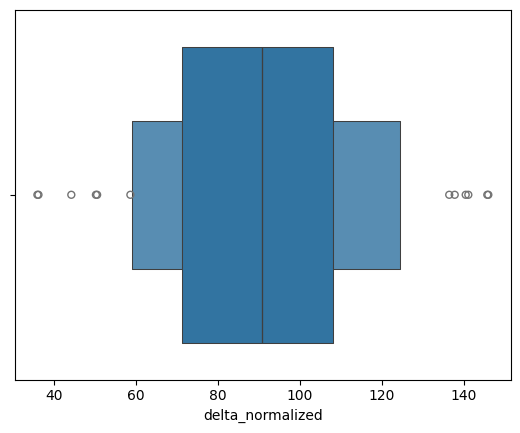

In [51]:
sns.boxenplot(x=df_vf['delta_normalized'])

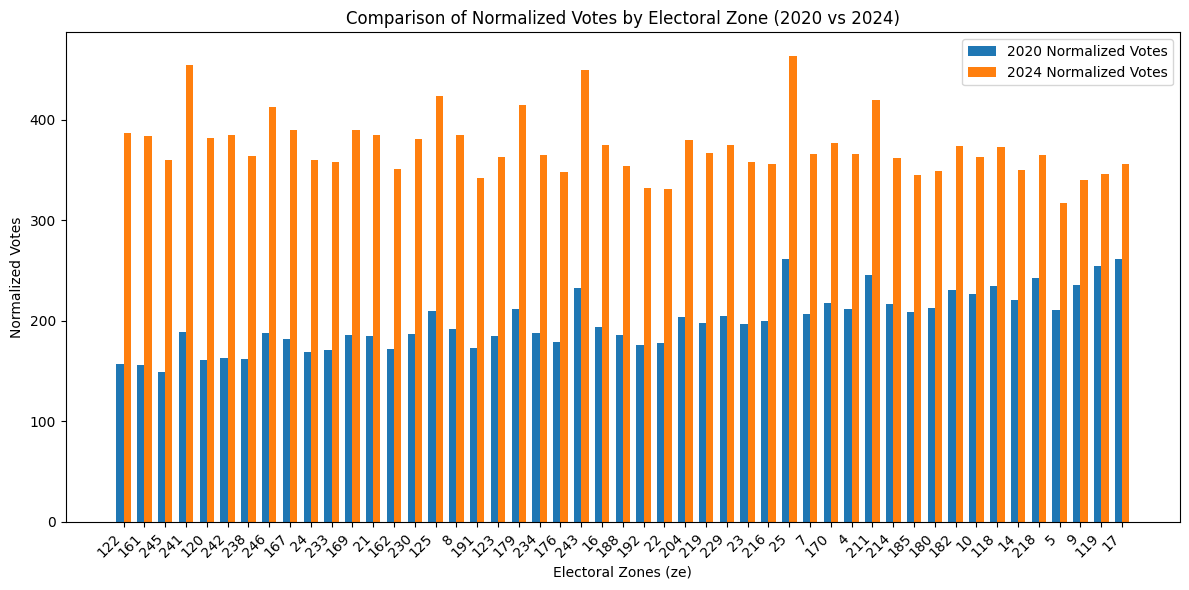

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Utilizando as novas colunas do DataFrame df_vf
labels = df_vf.index  # Usando o índice 'ze' como rótulos
votes_2020 = df_vf['normalized_20']
votes_2024 = df_vf['normalized_24']

x = np.arange(len(labels))  # a localização dos grupos de barras
width = 0.35  # a largura das barras

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, votes_2020, width, label='2020 Normalized Votes')
bars2 = ax.bar(x + width/2, votes_2024, width, label='2024 Normalized Votes')

# Adicionando títulos e rótulos
ax.set_xlabel('Electoral Zones (ze)')
ax.set_ylabel('Normalized Votes')
ax.set_title('Comparison of Normalized Votes by Electoral Zone (2020 vs 2024)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

#### The work is done 💪 
3 electoral zones with bigger delta: 122, 161 and 245 (West zone). <br> 
3 electoral zones with smaller delta: 9, 119 and 17 (South and West zones).